In [1]:
import tensorflow.keras as keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
import pandas as pd 
import numpy as np 
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from PIL import Image
import sklearn
from sklearn.model_selection import train_test_split
from statistics import mean
import pickle5 as pickle
from tensorflow.keras.optimizers import SGD
#from skimage import io
from tensorflow.keras.utils import to_categorical

In [2]:
X = np.load('./X_TRAIN_GIANT.npy', allow_pickle=True)
y = np.load('./y_train_GIANT.npy',allow_pickle=True)

In [4]:
# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.2, # Randomly zoom image 
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip = True,  # randomly flip images
#         vertical_flip=False)  # randomly flip images


# x_b = datagen.fit(X)

In [13]:
y = y.astype(int)

In [134]:
X.shape

(14291, 300, 300, 3)

In [135]:
y.shape

(14291, 10)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [28]:
# model = Sequential()
# model.add(Conv2D(filters=32, kernel_size=(5, 5), activation="relu", input_shape=(300,300,3)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# # model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
# # model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Dropout(0.25))
# # model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu",
# #                 kernel_regularizer=keras.regularizers.l2(0.01)))
# # model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Dropout(0.25))
# model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu',
#                 kernel_regularizer=keras.regularizers.l2(0.01)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# # model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu',
# #                 kernel_regularizer=keras.regularizers.l2(0.01)))
# # model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(100, activation="relu"))
# model.add(Dropout(0.25))
# # model.add(Dense(64, activation="relu"))
# # model.add(Dropout(0.25))
# model.add(Dense(10, activation='softmax'))
# model.summary()

In [29]:
from tensorflow.keras.optimizers import Adam
es = EarlyStopping(monitor='val_accuracy', patience = 3)
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#opt = Adam(lr=0.0001)
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [30]:
opt = tf.keras.optimizers.Adagrad(
     learning_rate=0.01,
     initial_accumulator_value=0.1,
     epsilon=1e-07,
     name="Adagrad"
 ) 

In [31]:
history = model.fit(X_train, y_train, 
                    batch_size=32, epochs=50, validation_data=(X_test,y_test),
                   callbacks=[es])
                    #callbacks=[es]
                    #batch_size=128)

Epoch 1/50
335/335 [==============================] - 1740s 5s/step - loss: 0.8719 - accuracy: 0.8206 - val_loss: 2.5493 - val_accuracy: 0.4318
Epoch 2/50
335/335 [==============================] - 1458s 4s/step - loss: 0.7164 - accuracy: 0.8383 - val_loss: 2.7189 - val_accuracy: 0.4433
Epoch 3/50
335/335 [==============================] - 1139s 3s/step - loss: 0.6475 - accuracy: 0.8497 - val_loss: 2.7548 - val_accuracy: 0.4335
Epoch 4/50
335/335 [==============================] - 1207s 4s/step - loss: 0.6002 - accuracy: 0.8588 - val_loss: 2.6863 - val_accuracy: 0.4456
Epoch 5/50
335/335 [==============================] - 1541s 5s/step - loss: 0.6056 - accuracy: 0.8613 - val_loss: 2.4264 - val_accuracy: 0.4391
Epoch 6/50
335/335 [==============================] - 1165s 3s/step - loss: 0.5919 - accuracy: 0.8565 - val_loss: 2.8554 - val_accuracy: 0.4430
Epoch 7/50
335/335 [==============================] - 1169s 3s/step - loss: 0.5813 - accuracy: 0.8669 - val_loss: 2.9798 - val_accuracy:

In [4]:
model = keras.models.load_model('./Model_GOOD_ONE')

In [6]:
preds = model.predict(X)

In [7]:
mm = preds.argmax(axis=-1)

In [14]:
inc = []
cor = []
for x in range(0,len(mm)):
    ind = mm[x]
    if y[x][ind] != 1:
        inc.append(x)
    else:
        cor.append(x)

In [15]:
len(inc) / len(mm)

0.2029948918900007

In [16]:
len(cor) / len(mm)

0.7970051081099992

In [34]:
loss, accuracy  = model.evaluate(X_test,y_test)

112/112 [==============================] - 78s 698ms/step - loss: 2.9798 - accuracy: 0.4383


In [56]:
from sklearn import metrics

In [84]:
list_of_genres = ['metal','country','rock','jazz','pop','r-n-b', 'rap', 'edm','hip-hop',
                 'indie']

In [103]:
img = X[20]

metal (0.763)
jazz (0.0507)
pop (0.0455)


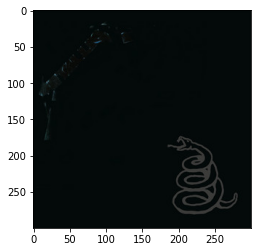

In [104]:
np.set_printoptions(suppress=True)
classes = np.array(list_of_genres)
proba = model.predict(img.reshape(1,300,300,3))[0]
top_3 = np.argsort(proba)[:-4:-1]
a = [0,1,2]
for i in a:
    ranger = proba[top_3[i]]
    if (ranger <= 0.0001):
        ranger = 0.0
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(ranger))
plt.imshow(img)
plt.show()

In [107]:
img = X[9871]

metal (0.406)
edm (0.267)
rock (0.157)


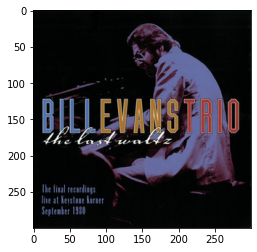

In [108]:
np.set_printoptions(suppress=True)
classes = np.array(list_of_genres)
proba = model.predict(img.reshape(1,300,300,3))[0]
top_3 = np.argsort(proba)[:-4:-1]
a = [0,1,2]
for i in a:
    ranger = proba[top_3[i]]
    if (ranger <= 0.0001):
        ranger = 0.0
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(ranger))
plt.imshow(img)
plt.show()

jazz (1.0)
rock (0.0)
rap (0.0)


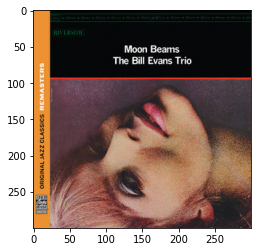

In [123]:
img = X[9870]
np.set_printoptions(suppress=True)
classes = np.array(list_of_genres)
proba = model.predict(img.reshape(1,300,300,3))[0]
top_3 = np.argsort(proba)[:-4:-1]
a = [0,1,2]
for i in a:
    ranger = proba[top_3[i]]
    if (ranger <= 0.0001):
        ranger = 0.0
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(ranger))
plt.imshow(img)
plt.show()

In [143]:
import matplotlib.image as mpimg
import cv2

pop (0.977)
jazz (0.0162)
rap (0.00454)


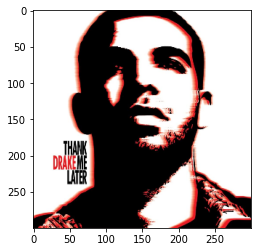

In [157]:
img=mpimg.imread('./drake.JPG')
img = cv2.resize(img, (300,300))
np.set_printoptions(suppress=True)
classes = np.array(list_of_genres)
proba = model.predict(img.reshape(1,300,300,3))[0]
top_3 = np.argsort(proba)[:-4:-1]
a = [0,1,2]
for i in a:
    ranger = proba[top_3[i]]
    if (ranger <= 0.0001):
        ranger = 0.0
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(ranger))
plt.imshow(img)
plt.show()

pop (0.417)
country (0.148)
edm (0.139)


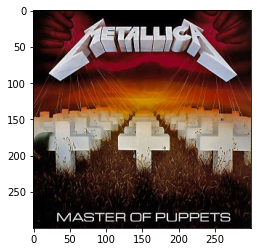

In [158]:
img=mpimg.imread('./Metallica_-_Master_of_Puppets_cover.JPG')
img = cv2.resize(img, (300,300))
np.set_printoptions(suppress=True)
classes = np.array(list_of_genres)
proba = model.predict(img.reshape(1,300,300,3))[0]
top_3 = np.argsort(proba)[:-4:-1]
a = [0,1,2]
for i in a:
    ranger = proba[top_3[i]]
    if (ranger <= 0.0001):
        ranger = 0.0
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(ranger))
plt.imshow(img)
plt.show()

pop (0.186)
edm (0.183)
indie (0.165)


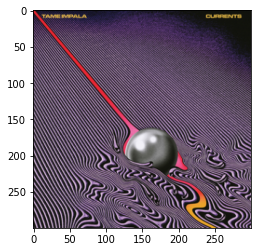

In [159]:
img=mpimg.imread('./Tame_Impala_-_Currents.PNG')
img = cv2.resize(img, (300,300))
np.set_printoptions(suppress=True)
classes = np.array(list_of_genres)
proba = model.predict(img.reshape(1,300,300,3))[0]
top_3 = np.argsort(proba)[:-4:-1]
a = [0,1,2]
for i in a:
    ranger = proba[top_3[i]]
    if (ranger <= 0.0001):
        ranger = 0.0
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(ranger))
plt.imshow(img)
plt.show()

pop (0.297)
edm (0.207)
rap (0.189)


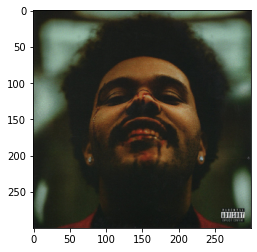

In [168]:
img=mpimg.imread('./weeknd.JPG')
img = cv2.resize(img, (300,300))
np.set_printoptions(suppress=True)
classes = np.array(list_of_genres)
proba = model.predict(img.reshape(1,300,300,3))[0]
top_3 = np.argsort(proba)[:-4:-1]
a = [0,1,2]
for i in a:
    ranger = proba[top_3[i]]
    if (ranger <= 0.0001):
        ranger = 0.0
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(ranger))
plt.imshow(img)
plt.show()

In [23]:
df = pd.read_csv('./FINALLY.csv')

In [26]:
def CreateMultiLabelDataframe(df):
    listo = []
    list_of_genres = ['metal','country','rock','jazz','pop','r-n-b', 'rap', 'edm','hip-hop',
                 'indie']
    for x,y in df.iterrows():
        cr = df.iloc[x]
        genre = cr.Genre
        albums = cr.Album_Covers.split(',')
        ids = cr.ArtistID
        for album in albums:
            values = [cr.Artist, album]
            for item in list_of_genres:
                if genre == item:
                    values.append(1)
                else:
                    values.append(0)
            cols = ['artist','album'] + list_of_genres
            #print(values)
            temp = pd.DataFrame(np.array(values).reshape(1,-1), columns=cols)
            listo.append(temp)
    return pd.concat(listo)

In [27]:
tst = CreateMultiLabelDataframe(df)
tst.reset_index(inplace=True,drop=True)

In [57]:
len(X)

14291

In [58]:
len(tst)

14982